In [0]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

In [0]:
from IPython.display import clear_output

Task: Language Classification

The aim of this project is to build a model which predicts the language given a name (which is essentially a sequence of characters)

<h3> Data Preprocessing </h3>

In [0]:
languages = []
data = []
X = []
y = []

with open('name2lang.txt', 'r') as f: 
    for line in f:
        line = line.split(',')
        name = line[0].strip()
        lang = line[1].strip()
        if not lang in languages:
            languages.append(lang)
        X.append(name)
        y.append(lang)
        data.append((name, lang))

n_languages = len(languages)

In [0]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


There are totally 18 languages

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [8]:
print(X_train)

['Abashkin', 'Gulimov', 'Tzelobenok', 'Funnell', 'Zhui', 'Jukes', 'Togunov', 'Sabbag', 'Kartomyshev', 'Makhnenko', 'Sokolsky', 'Masuno', 'Varela', 'Moffat', 'Bonner', 'Berezovsky', 'Helkvist', 'Thurston', 'Tovstuha', 'Millar', 'Tulintsev', 'Furey', 'Isaenko', 'Kalachev', 'Takecare', 'Newcombe', 'Taku', 'Artibyakin', 'Saifulov', 'Morcos', 'Jagodnikov', 'Halifman', 'Bagaryakoff', 'Pavluhin', 'Mari', 'Awramchik', 'Agaltsov', 'Fisichev', 'Shizuma', 'Yankin', 'Luts', 'Toshitala', 'Germain', 'Botros', 'Poulter', 'Lischenko', 'Porter', 'Melendez', 'Ibu', 'Carr', 'Ursler', 'Aderikhin', 'Gimondi', 'Rzhevsky', 'Slater', 'Atkin', 'Yagafarov', 'Huraskin', 'Underhill', 'Pylin', 'Yuschenko', 'Ardovini', 'Tunison', 'Dobrovolsky', 'Bezyzvestnyh', 'Roussel', 'Balakshin', 'Trumbauer', 'Vallance', 'Boerio', 'Waugh', 'Baz', 'Reading', 'Komon', 'Ireson', 'Venables', 'Tikhotsky', 'Spada', 'Winfield', 'Mikhnov', 'Lubsky', 'Antar', 'Sheehan', 'Tuma', 'Yuzefovich', 'Yamburg', 'Yukhvidov', 'Mikhail', 'Chi', 'De

<h4> Creating Vector Representation for Inputs </h4>

<p> Since the possible inputs are set of all english albhabets(capital and small) we represent each alphabet using a one hot vector. The size of each input vector is equal to the total number of characters (n_letters) </p>

In [0]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [10]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [0]:
# Creating one hot representation for each input
def name_rep(name):
    rep = torch.zeros(len(name), 1, n_letters) # Tensor for word representation, which is basically combination of 
                                               # vector representation of each character in the word
    for index, letter in enumerate(name):
        pos = all_letters.find(letter)
        #print(pos)
        rep[index][0][pos] = 1
    return rep

In [12]:
name_rep('Kim') # note 'i' represented by 1 at 8th index

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])

<h4> Creating Vector Representation for Output </h4>

In [0]:
def lang_rep(lang):
  return torch.tensor([languages.index(lang)],dtype = torch.long)

In [19]:
languages.index('English')

12

In [20]:
lang_rep('English')

tensor([12])

<h4> Data Visualisation </h4>

In [0]:
count = {}
for l in languages: 
    count[l] = 0
for d in data:
    count[d[1]] += 1 # d[0] is name, d[1] is language

In [24]:
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


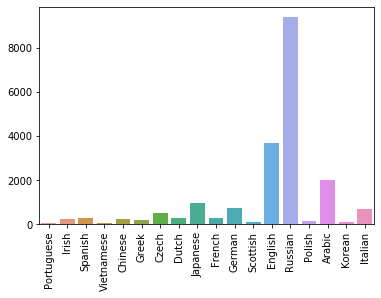

In [25]:
plt_ = sns.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

The number of English , Russian and Arabic datapoints are very large compared to other languages, which may cause some problems while building the model


<h3> RNN Model </h3>

In [0]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN,self).__init__() #calling init of parent class
    self.hidden_size = hidden_size
    self.i2h = nn.Linear(input_size+hidden_size , hidden_size) # Take current input and previous hidden state to compute
                                                               # current hidden state ()
                                                               
    self.i2o = nn.Linear(input_size + hidden_size , output_size)# Take current input and previous hidden state to compute
                                                               # current hidden state
                                                               
    self.softmax = nn.LogSoftmax(dim = 1) 

  def forward(self,input_, hidden):
    combined = torch.cat((input_,hidden),1)
    hidden =  self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)

    return output,hidden

  def init_hidden(self): # We write this function here to ensure size of hidden state is uniform throughout code
    return torch.zeros(1, self.hidden_size)





In [0]:
n_hidden = 128
net = RNN(n_letters, n_hidden, n_languages) 

<h3> Inference </h3>

In [0]:
#To see output of the untrained model for given name as input
def infer(net, name):
    net.eval() # We are not training the model
    name_ohe = name_rep(name) # Convert input to combination of one hot vector representation
    hidden = net.init_hidden() # Initialise hidden state
    
    #print(name_ohe.size()[0]) # Basically number of letters in input
    for i in range(name_ohe.size()[0]):
        output, hidden = net(name_ohe[i], hidden)
    
    return output

In [33]:
name_rep('Adam').size()

torch.Size([4, 1, 57])

In [34]:
output = infer(net, 'Adam')
index = torch.argmax(output)
print(output, index)

tensor([[-2.7722, -2.8402, -2.8189, -3.0033, -2.8636, -2.9102, -2.8491, -2.7291,
         -2.8906, -2.9231, -2.9219, -2.8852, -2.8344, -2.8339, -2.9777, -3.0264,
         -3.0206, -2.9884]], grad_fn=<LogSoftmaxBackward>) tensor(7)


Note: In infer we do not pass output through softmax layer but instead directly take the output and find the max argument. This is because softmax is computationally expensive and we want to avoid it

<h3> Custom DataLoader </h3>

In [0]:
#custom data loader
def dataloader(npoints, X_, y_):
    to_ret = []
    for i in range(npoints):
        #Here randint returns a random integer from 0 to len(X_)
        index_ = np.random.randint(len(X_)) # Randomly sample (pick up) data

        name, lang = X_[index_], y_[index_] # Obtain name and language in train data corresponding to randomly selected int
        to_ret.append((name, lang, name_rep(name), lang_rep(lang))) # Obtain one hot representations of both of them
    return to_ret

In [0]:
#dataloader(2, X_train, y_train) # What if same point sampled multiple times

<h3> Custom Evaluation Function </h3>

In [0]:
def eval(net, n_points,k, X_, y_):

  data_ = dataloader(n_points,X_, y_)
  correct = 0 

  for name, lang, name_rep, lang_rep  in data_:
      output = infer(net, name) # forwards pass
      val, indices = output.topk(k) # obtaining top k values and their corresponding indices in the 18 dim output
                                    # (extension of torch.argmax)
        
      if lang_rep in indices: # if correct language in top k predictions
          correct += 1
            
  accuracy = correct/n_points
  return accuracy

In [48]:
eval(net, 1000, 3, X_test, y_test)


0.423


Accuracy without training

<h3> Train </h3>

In [0]:
def train(net, opt, criterion, n_points):
    
    opt.zero_grad()
    total_loss = 0
    
    data_ = dataloader(n_points, X_train, y_train)
    
    for name, language, name_ohe, lang_rep in data_:

        hidden = net.init_hidden()

        for i in range(name_ohe.size()[0]): # forward pass
            output, hidden = net(name_ohe[i], hidden) # Note that same hidden variable is used on lhs and rhs
            
        loss = criterion(output, lang_rep)
        loss.backward(retain_graph=True) 
        total_loss += loss
        
    opt.step()       # Entire backpropagation through time is done just in this one line
        
            
    return total_loss/n_points

In [0]:
criterion = nn.NLLLoss() #negative log likelihood
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [40]:
%%time 
train(net, opt, criterion, 200)

CPU times: user 253 ms, sys: 20 ms, total: 273 ms
Wall time: 473 ms


tensor(2.8670, grad_fn=<DivBackward0>)

In [41]:
eval(net, 1000, 1, X_test, y_test)

0.473

<h3> Train Setup </h3>


In [0]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq=5):
    
    # Hyperparameters
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
    
    loss_arr = np.zeros(n_batches + 1) #torch.zeros?
    
    for i in range(n_batches):
        loss_arr[i+1] = (loss_arr[i]*i + train(net, opt, criterion, batch_size))/(i + 1) 
        # Sum of all the previous losses
        
        if i%display_freq == display_freq-1:
            clear_output(wait=True)
            
            print('Iteration', i, 'Top-1:', eval(net, len(X_test), 1, X_test, y_test), 'Top-2:', eval(net, len(X_test), 2, X_test, y_test), 'Loss', loss_arr[i])
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')
                      

Iteration 99 Top-1: 0.6593516209476309 Top-2: 0.7708229426433916 Loss 1.4528573751449585


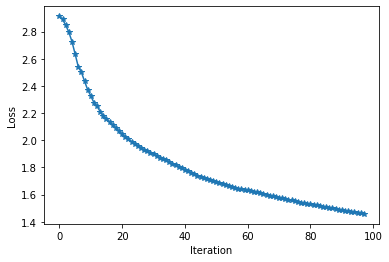

In [46]:
n_hidden = 128
net = RNN(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

<h3> Confusion Matrix </h3

In [89]:
len(data)

20050

In [0]:
def get_confusion_mat(net, n_points,k, X_, y_):

  cfm = np.zeros((n_languages,n_languages))

  data_ = dataloader(n_points,X_, y_)
   

  for name, lang, name_rep, lang_rep  in data_:
      output = infer(net, name) # forwards pass
      val, index = output.topk(1) # obtaining top value and their corresponding indices in the 18 dim output
                                    # (extension of torch.argmax)
        
      cfm[languages.index(lang)][index] += 1    

  return cfm  


In [0]:
cfm = get_confusion_mat(net, 1000, 1, X_test, y_test)

In [92]:
# Per class accuracy
for lang_ind in range(18):
  total = np.sum(cfm[lang_ind])
  correct = cfm[lang_ind][lang_ind]
  print(languages[lang_ind],"---Total:",total,"--Accuracy :", correct /total)


Portuguese ---Total: 4.0 --Accuracy : 0.0
Irish ---Total: 11.0 --Accuracy : 0.0
Spanish ---Total: 9.0 --Accuracy : 0.0
Vietnamese ---Total: 1.0 --Accuracy : 0.0
Chinese ---Total: 17.0 --Accuracy : 0.11764705882352941
Greek ---Total: 10.0 --Accuracy : 0.0
Czech ---Total: 29.0 --Accuracy : 0.0
Dutch ---Total: 14.0 --Accuracy : 0.0
Japanese ---Total: 53.0 --Accuracy : 0.5849056603773585
French ---Total: 15.0 --Accuracy : 0.0
German ---Total: 34.0 --Accuracy : 0.0
Scottish ---Total: 5.0 --Accuracy : 0.0
English ---Total: 196.0 --Accuracy : 0.6683673469387755
Russian ---Total: 450.0 --Accuracy : 0.8688888888888889
Polish ---Total: 2.0 --Accuracy : 0.0
Arabic ---Total: 110.0 --Accuracy : 0.8818181818181818
Korean ---Total: 6.0 --Accuracy : 0.0
Italian ---Total: 34.0 --Accuracy : 0.35294117647058826


In [0]:
import seaborn as sn
import pandas as pd

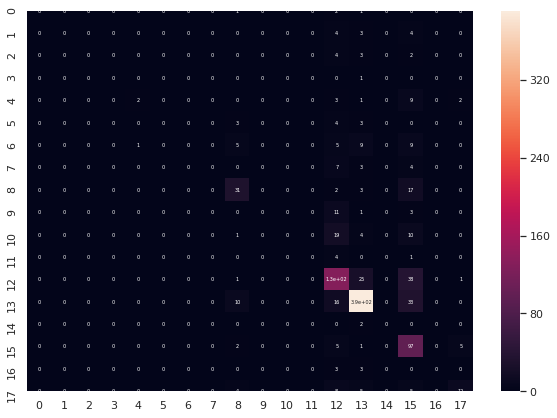

In [94]:
df_cm = pd.DataFrame(cfm, range(18),
                  range(18))
plt.figure(figsize = (10,7))
sn.set(font_scale=1)#for label size
sn.heatmap(cfm, annot=True,annot_kws={"size": 5})# font size

plt.show()
